In [48]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
matplotlib.rcParams['font.family'] = 'serif'
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
warnings.filterwarnings('ignore')
figPath = "/Users/Ali/Dropbox/paper/figures"

## Carreau-Yassuda

In [200]:
(nu*x).shape

(10000,)

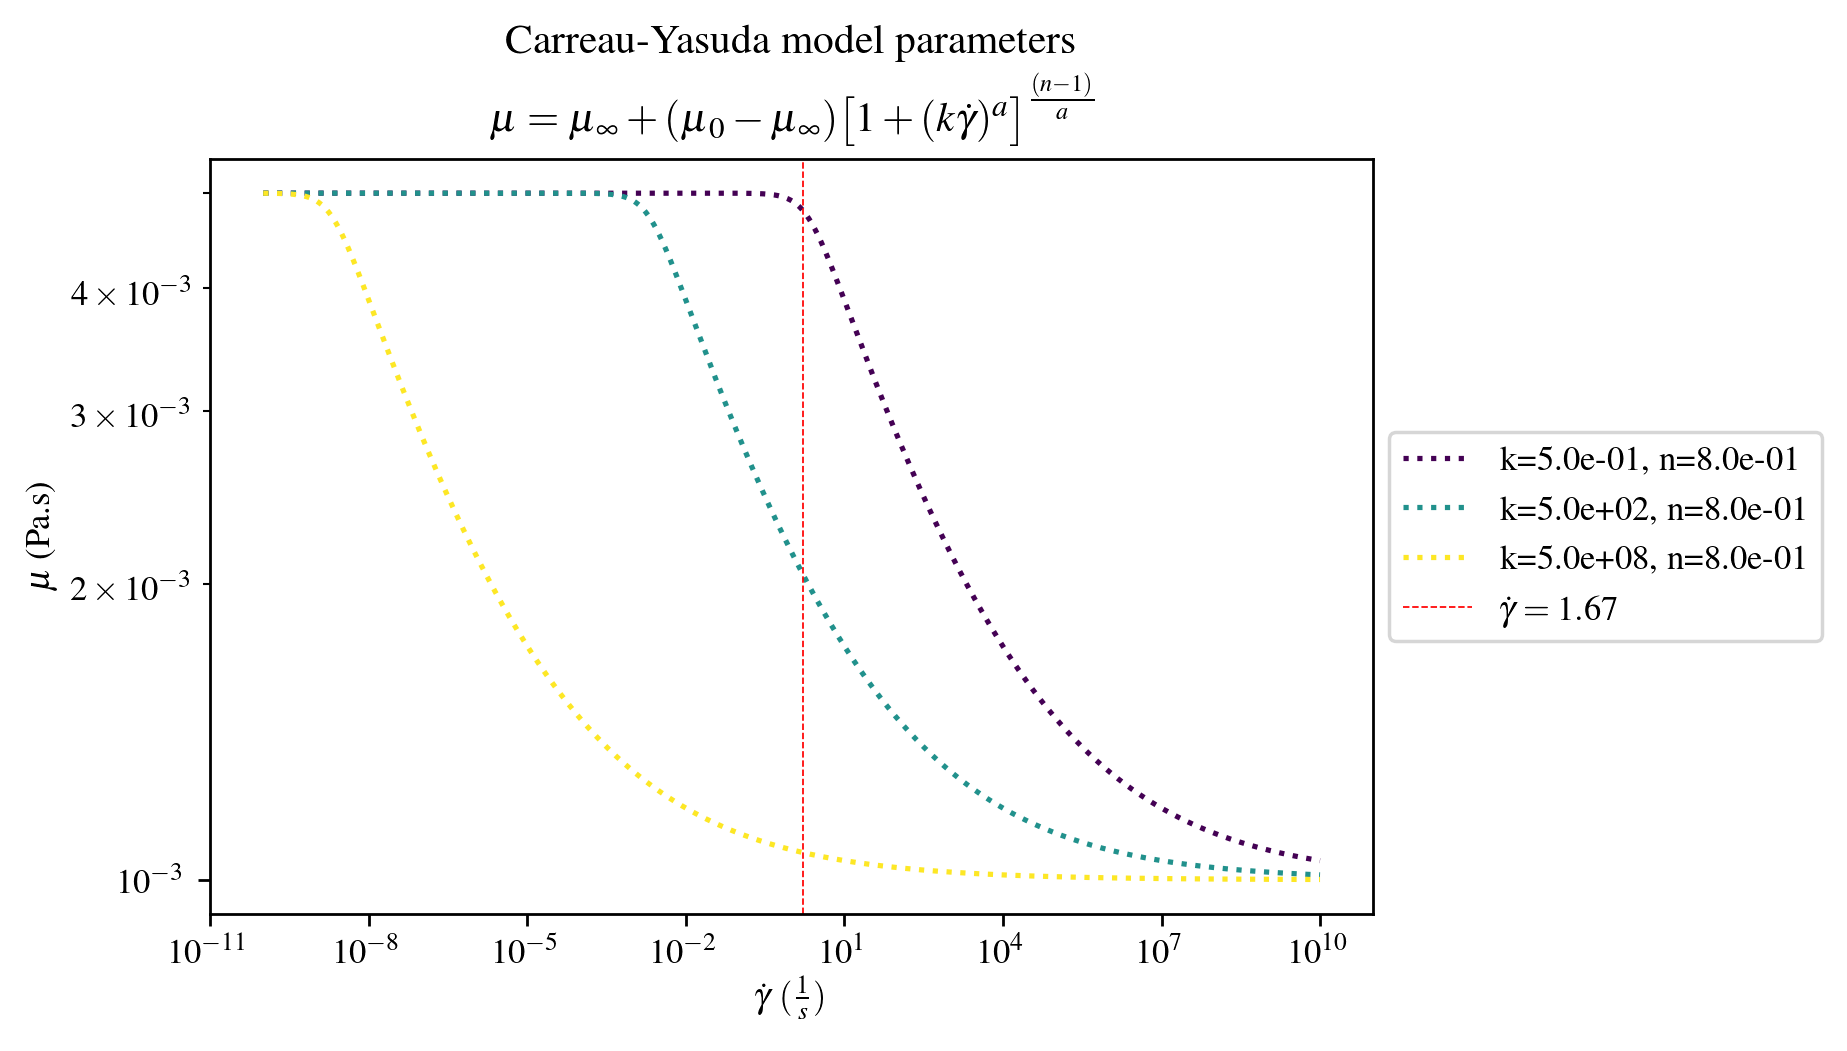

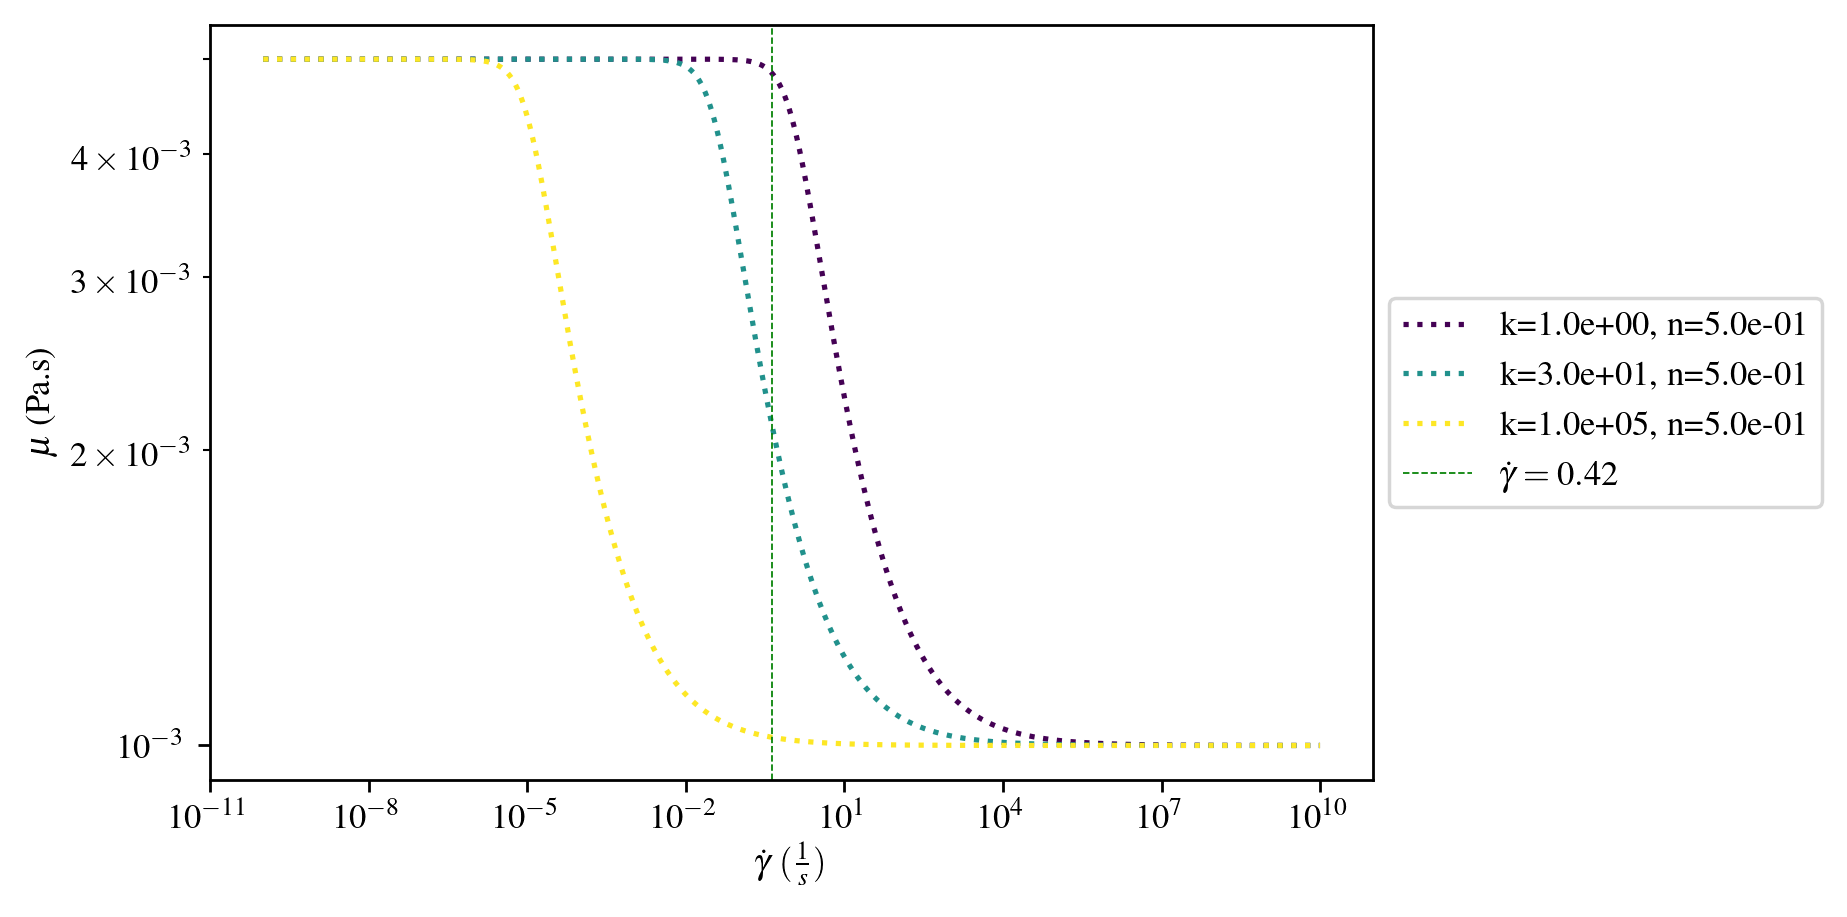

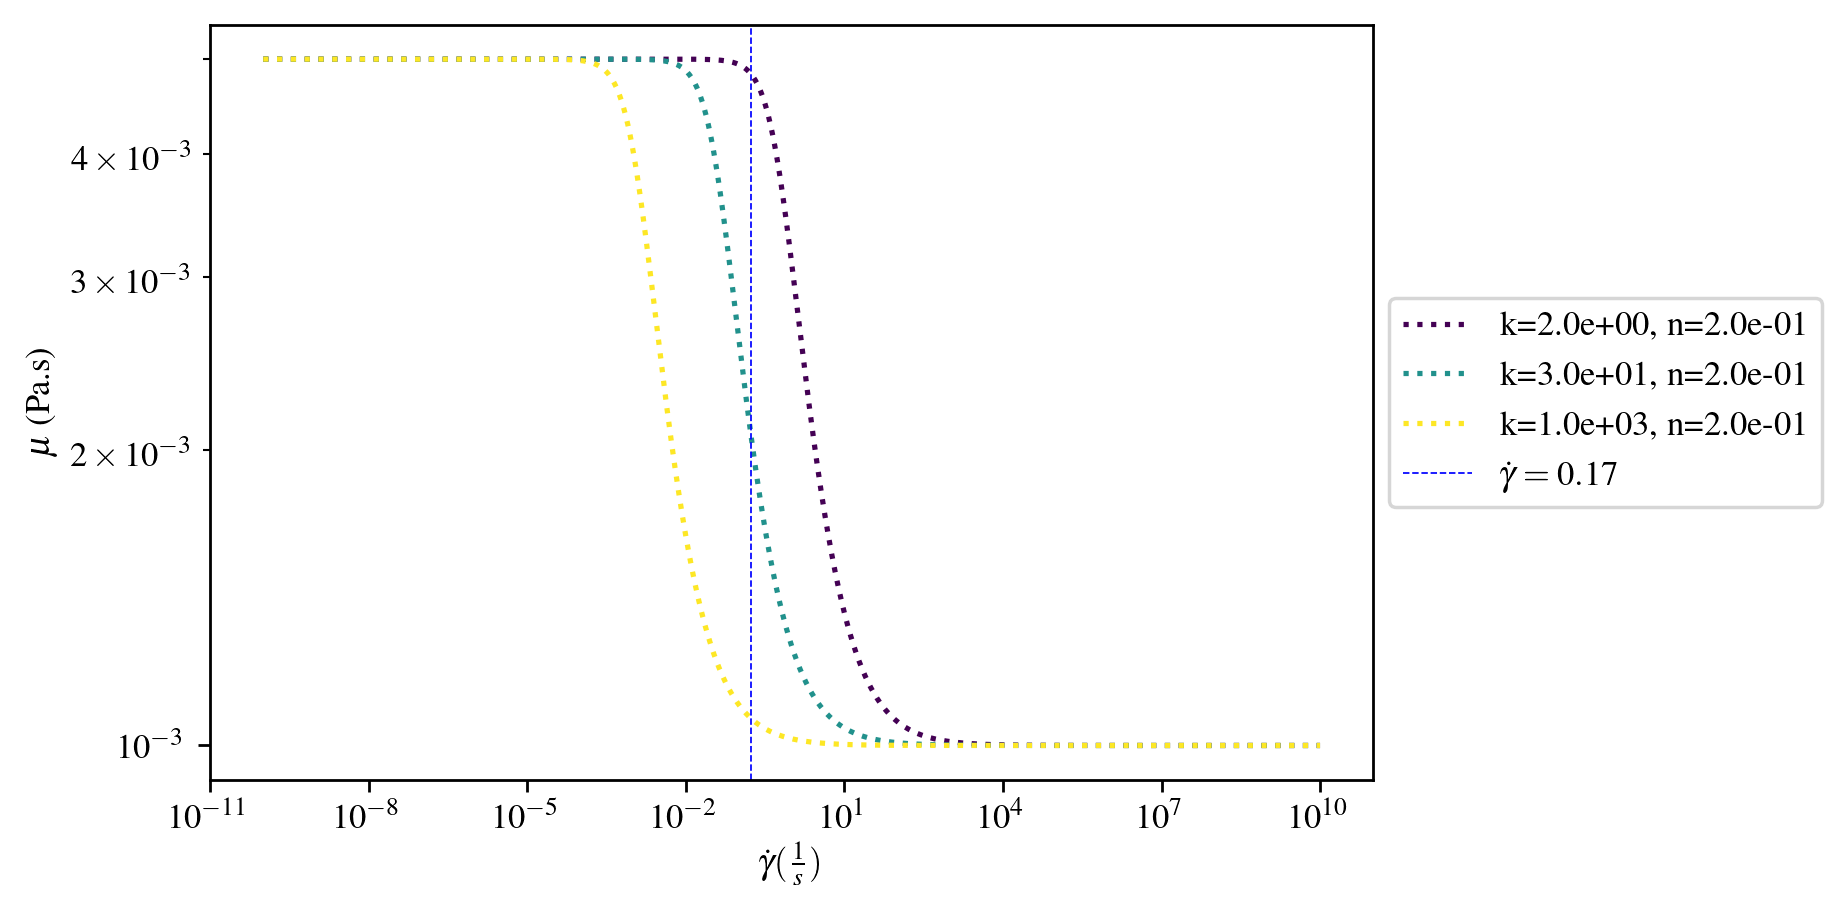

In [208]:
import pylab
import matplotlib.pyplot as plt
import numpy

def get_cmap(n,name='viridis'):
    return plt.cm.get_cmap(name,n)

a = 2
nu0=5e-3
nuinf=1e-3
h_channel = 1.2 #m
shear_rate_order = 10
x = numpy.logspace(-shear_rate_order,shear_rate_order,10000)
k=[5e-1,5e2,5e8]
n=[0.8]
fig, ax = plt.subplots(figsize=(6,4),dpi=250,facecolor='w')
velocity = 2.0 #m/s
shear_rate = velocity/h_channel #1/s
dim=len(k)*len(n)
cmap=get_cmap(dim)
right, bottom, width, height = [0.6, 0.6, 0.28, 0.25]
#ax2 = fig.add_axes([right, bottom, width, height])
for i_k in range(len(k)):
    for i_n in range(len(n)):
        index = i_k*len(n)+i_n
        nu = nuinf+(nu0-nuinf)*(1+(k[i_k]*x)**a)**((n[i_n]-1)/a)
        ax.loglog(x,nu,':',c=cmap(int(index)),mfc='w',markersize=2,label="k=%2.1e, n=%2.1e" % (k[i_k],n[i_n]))
        ax.set_ylabel(r'$\mu$'+' (Pa.s)')
        ax.set_xlabel(r'$\dot{\gamma}  \ (\frac{1}{s})$')
        
ax.axvline(x=(shear_rate),c='r',lw=0.5,linestyle='--',label=(r'$\dot{\gamma} = %2.2f $')%shear_rate)
ax.legend(loc='center',bbox_to_anchor=(1.2,0.5))
ax.set_title('Carreau-Yasuda model parameters \n ' + 
             r'$\mu=\mu_{\,\infty}+(\mu_{\,0}-\mu_{\,\infty})\big[{1+(k\dot{\gamma})^a}\big]^{\frac{{(n-1)}_{ }}{a}}$')
pylab.show()
k=[1,30,1e5]
n=[0.5]
f, ax = plt.subplots(figsize=(6,4),dpi=250,facecolor='w')
velocity = 0.5 #m/s
shear_rate = velocity/h_channel #1/s
dim=len(k)*len(n)
cmap=get_cmap(dim)
for i_k in range(len(k)):
    for i_n in range(len(n)):
        index = i_k*len(n)+i_n
        nu = nuinf+(nu0-nuinf)*(1+(k[i_k]*x)**a)**((n[i_n]-1)/a)
        ax.loglog(x,nu,':',c=cmap(int(index)),mfc='w',markersize=2,label="k=%2.1e, n=%2.1e" % (k[i_k],n[i_n]))
        ax.set_ylabel(r'$\mu$'+' (Pa.s)')
        ax.set_xlabel(r'$\dot{\gamma}  \ (\frac{1}{s})$')
ax.axvline(x=(shear_rate),c='g',lw=0.5,linestyle='--',label=(r'$\dot{\gamma} = %2.2f $')%shear_rate)
ax.legend(loc='center',bbox_to_anchor=(1.2,0.5))

pylab.show()


k=[2,30,1e3]
n=[0.2]
f, ax = plt.subplots(figsize=(6,4),dpi=250,facecolor='w')
velocity = 0.2 #m/s
shear_rate = velocity/h_channel #1/s
dim=len(k)*len(n)
cmap=get_cmap(dim)
for i_k in range(len(k)):
    for i_n in range(len(n)):
        index = i_k*len(n)+i_n
        nu = nuinf+(nu0-nuinf)*(1+(k[i_k]*x)**a)**((n[i_n]-1)/a)
        ax.loglog(x,nu,':',c=cmap(int(index)),mfc='w',markersize=2,label="k=%2.1e, n=%2.1e" % (k[i_k],n[i_n]))
        ax.set_ylabel(r'$\mu$'+' (Pa.s)')
        ax.set_xlabel(r'$\dot{\gamma} (\frac{1}{s})$')
ax.axvline(x=shear_rate,c='b',lw=0.5,linestyle='--',label=(r'$\dot{\gamma} = %2.2f $')%shear_rate)
ax.legend(loc='center',bbox_to_anchor=(1.2,0.5))
pylab.show()


## Herschel-Bulkley

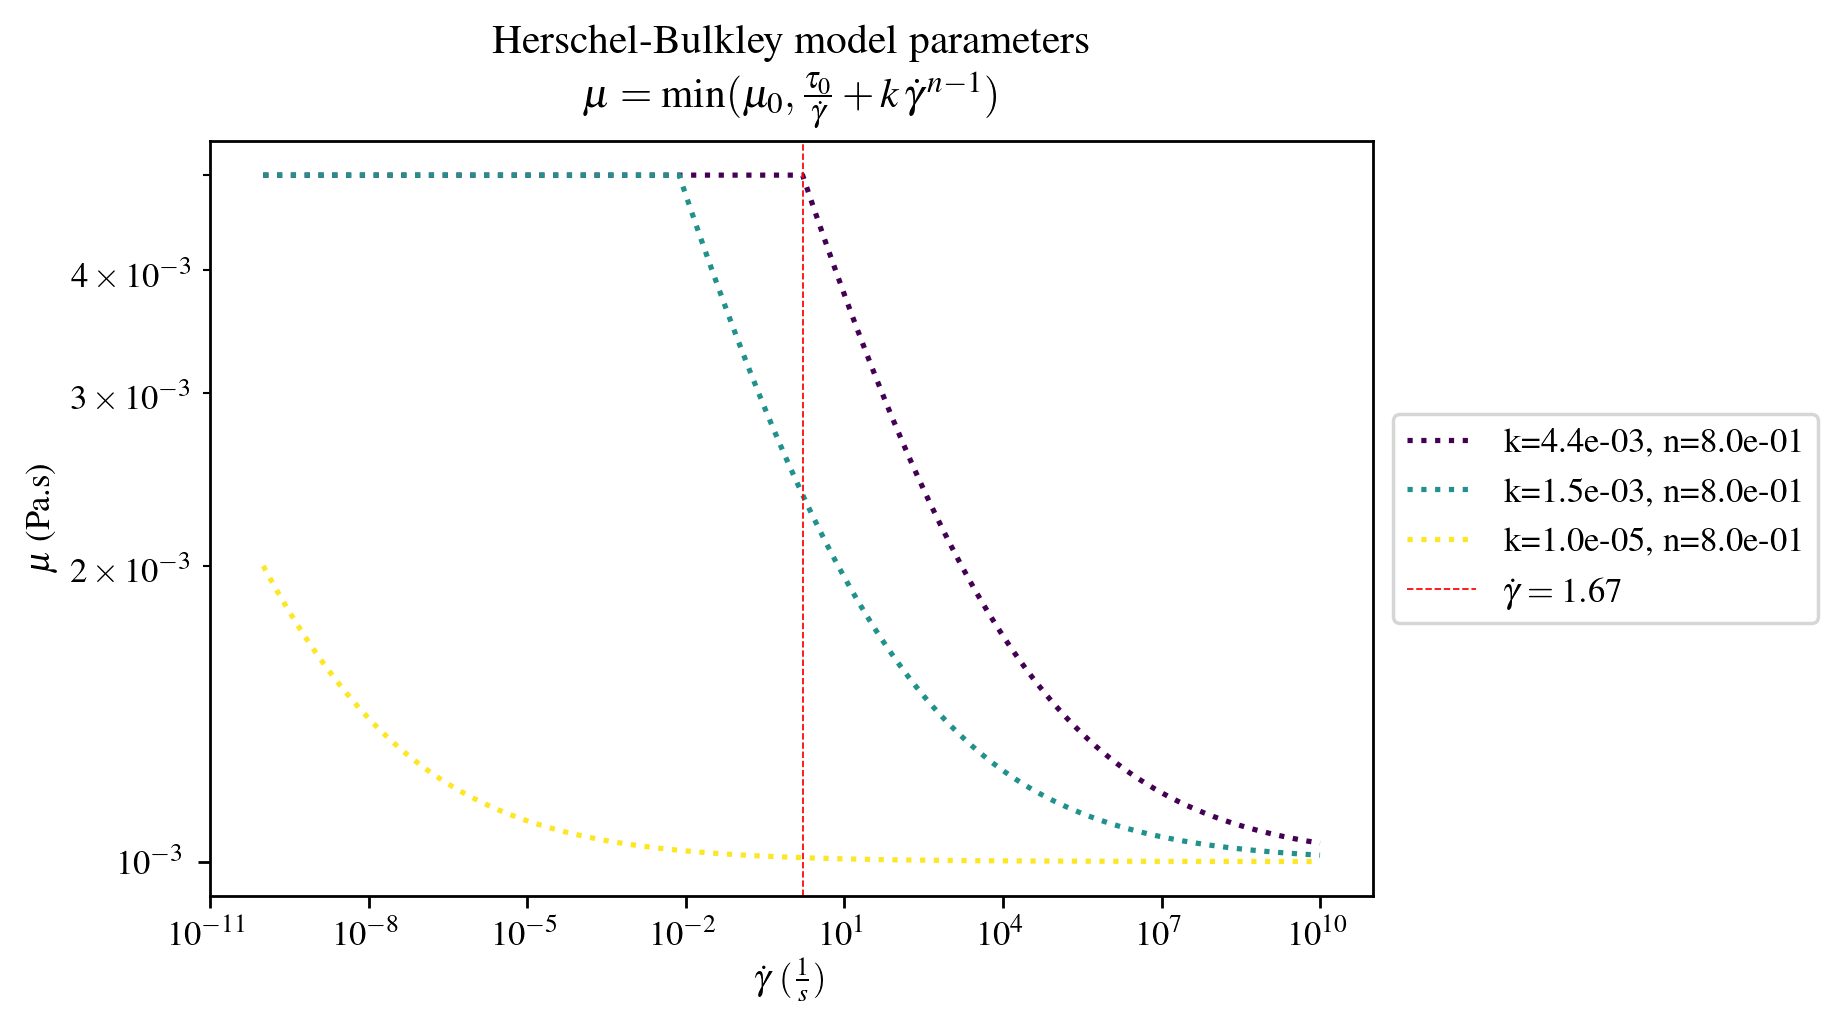

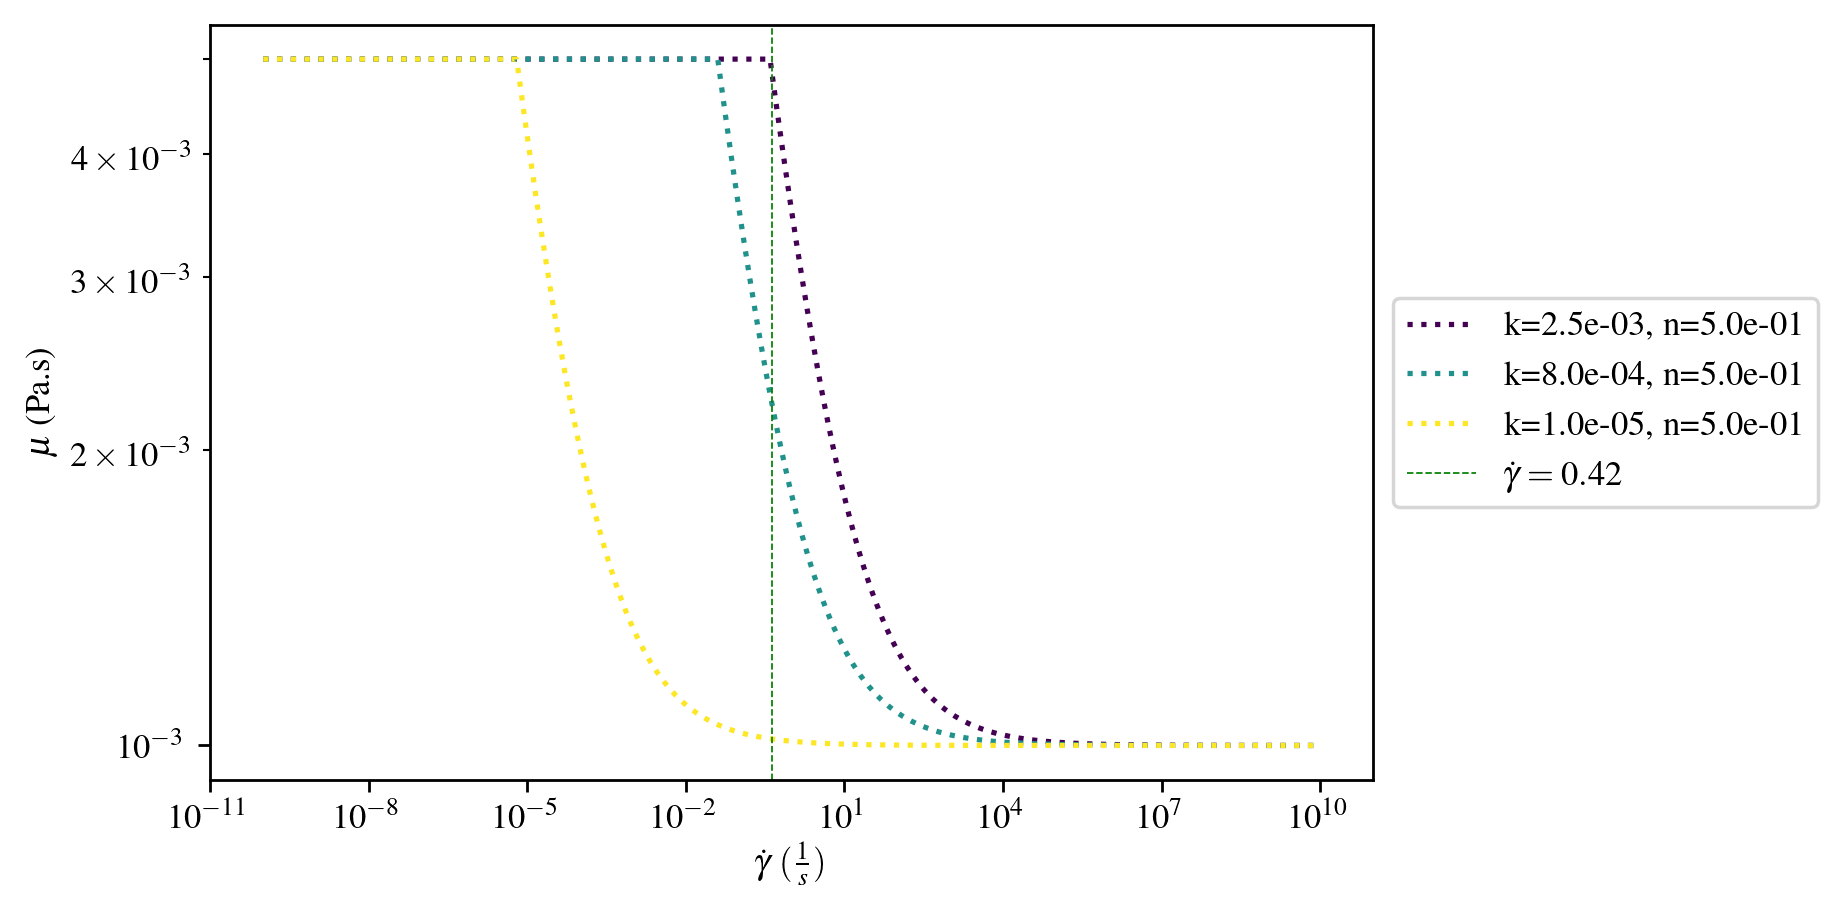

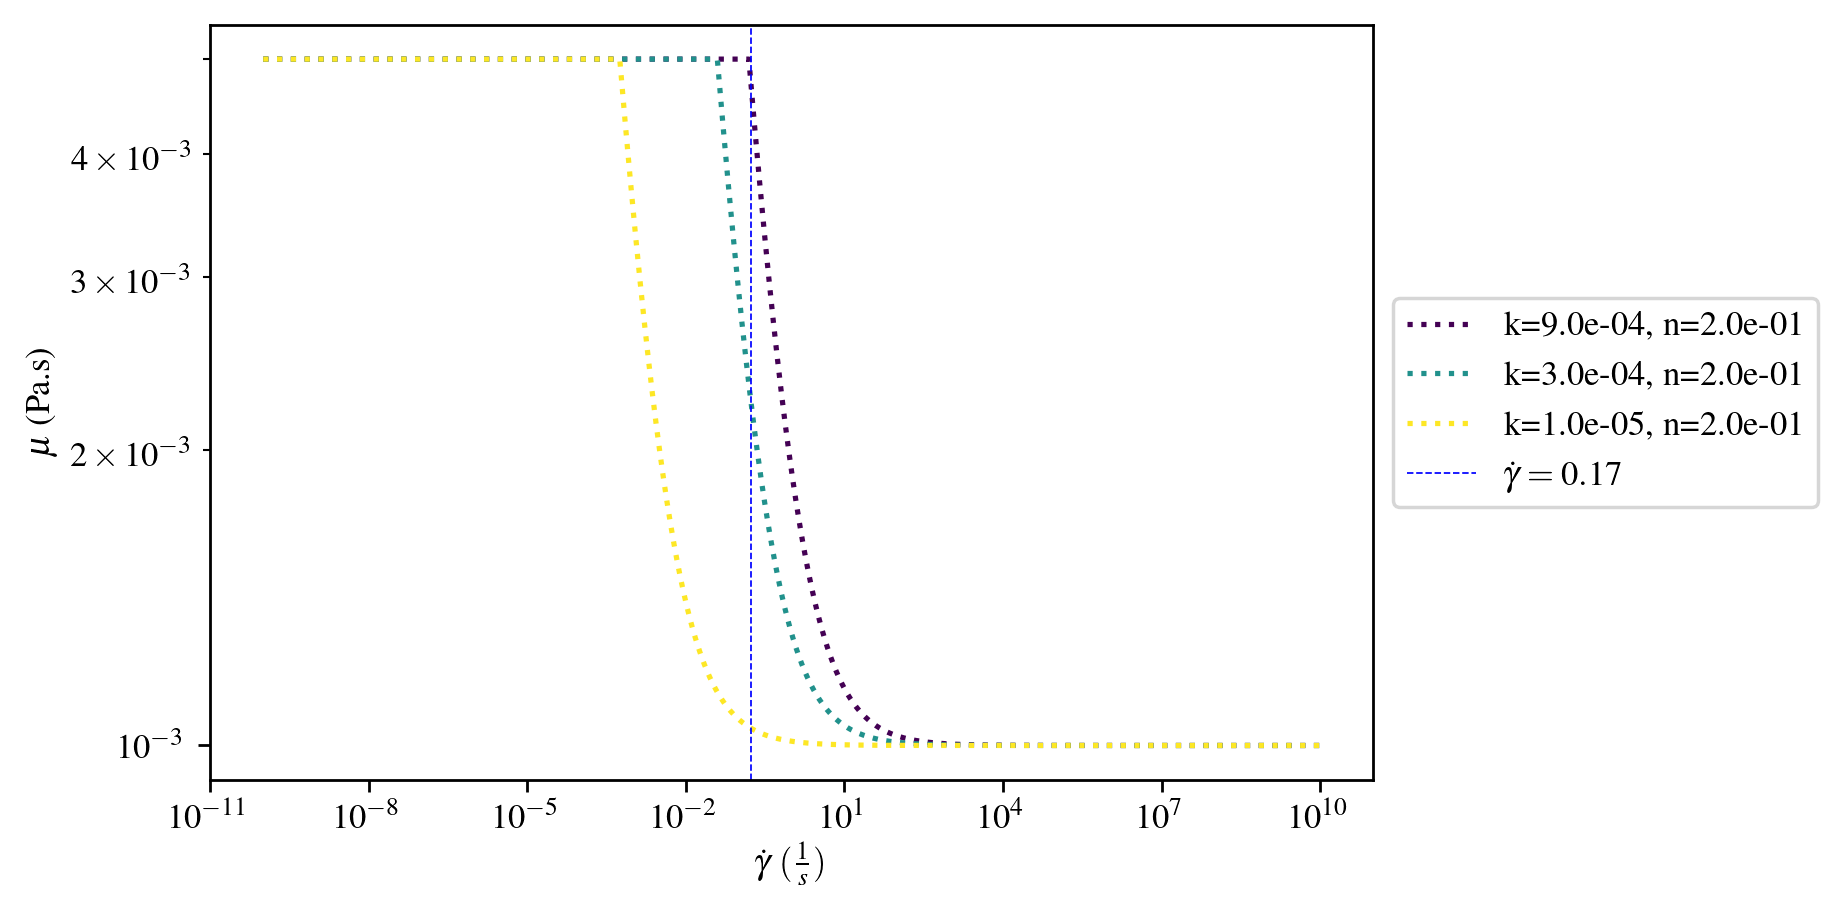

In [177]:
import pylab
import matplotlib.pyplot as plt
import numpy

def get_cmap(n,name='viridis'):
    return plt.cm.get_cmap(name,n)

a = 2
npoints = 10000
h_channel = 1.2 #m
velocity = 2.0 #m/s
shear_rate = velocity/h_channel #1/s
nu0=5e-3*numpy.ones(npoints)
nuinf=1e-3 # Newtonian regime
tau0=shear_rate*nuinf*numpy.ones(npoints)
shear_rate_order = 10
x = numpy.logspace(-shear_rate_order,shear_rate_order,npoints)

f, ax = plt.subplots(figsize=(6,4),dpi=250,facecolor='w')
k=[4.4e-3,1.5e-3,1e-5]
n=[0.8]
dim=len(k)*len(n)
cmap=get_cmap(dim)
for i_k in range(len(k)):
    for i_n in range(len(n)):
        index = i_k*len(n)+i_n
        nu = numpy.minimum(nu0,(tau0/shear_rate)+k[i_k]*(x**(n[i_n]-1)))
        ax.loglog(x,nu,':',c=cmap(int(index)),mfc='w',markersize=2,label="k=%2.1e, n=%2.1e" % (k[i_k],n[i_n]))
        ax.set_ylabel(r'$\mu$'+' (Pa.s)')
        ax.set_xlabel(r'$\dot{\gamma}  \ (\frac{1}{s})$')
ax.axvline(x=(shear_rate),c='r',lw=0.5,linestyle='--',label=(r'$\dot{\gamma} = %2.2f $')%shear_rate)
ax.set_title("Herschel-Bulkley model parameters \n " + 
             r'$\mu = \mathrm{min}(\mu_0,\frac{\tau_0}{\dot{\gamma}}+k\,\dot{\gamma}^{\,n-1})$')
ax.legend(loc='center',bbox_to_anchor=(1.2,0.5))
pylab.show()

f, ax = plt.subplots(figsize=(6,4),dpi=250,facecolor='w')
k=[2.5e-3,8e-4,1e-5]
n=[0.5]
velocity = 0.5 #m/s
shear_rate = velocity/h_channel #1/s
tau0=shear_rate*nuinf*numpy.ones(npoints)
dim=len(k)*len(n)
cmap=get_cmap(dim)
for i_k in range(len(k)):
    for i_n in range(len(n)):
        index = i_k*len(n)+i_n
        nu = numpy.minimum(nu0,(tau0/shear_rate)+k[i_k]*(x**(n[i_n]-1)))
        ax.loglog(x,nu,':',c=cmap(int(index)),mfc='w',markersize=2,label="k=%2.1e, n=%2.1e" % (k[i_k],n[i_n]))
        ax.set_ylabel(r'$\mu$'+' (Pa.s)')
        ax.set_xlabel(r'$\dot{\gamma}  \ (\frac{1}{s})$')
ax.axvline(x=(shear_rate),c='g',lw=0.5,linestyle='--',label=(r'$\dot{\gamma} = %2.2f $')%shear_rate)
ax.legend(loc='center',bbox_to_anchor=(1.2,0.5))
pylab.show()

f, ax = plt.subplots(figsize=(6,4),dpi=250,facecolor='w')
k=[9e-4,3e-4,1e-5]
n=[0.2]
velocity = 0.2 #m/s
shear_rate = velocity/h_channel #1/s
tau0=shear_rate*nuinf*numpy.ones(npoints)
shear_rate = velocity/h_channel #1/s
dim=len(k)*len(n)
cmap=get_cmap(dim)
for i_k in range(len(k)):
    for i_n in range(len(n)):
        index = i_k*len(n)+i_n
        nu = numpy.minimum(nu0,(tau0/shear_rate)+k[i_k]*(x**(n[i_n]-1)))
        ax.loglog(x,nu,':',c=cmap(int(index)),mfc='w',markersize=2,label="k=%2.1e, n=%2.1e" % (k[i_k],n[i_n]))
        ax.set_ylabel(r'$\mu$'+' (Pa.s)')
        ax.set_xlabel(r'$\dot{\gamma}  \ (\frac{1}{s})$')
ax.axvline(x=(shear_rate),c='b',lw=0.5,linestyle='--',label=(r'$\dot{\gamma} = %2.2f $')%shear_rate)
ax.legend(loc='center',bbox_to_anchor=(1.2,0.5))
pylab.show()


In [18]:
(tau0/shear_rate)+k[i_k]*(x**(n[i_n]-1))

array([1.00000000e+10, 9.54548457e+09, 9.11162756e+09, 8.69749003e+09,
       8.30217568e+09, 7.92482898e+09, 7.56463328e+09, 7.22080902e+09,
       6.89261210e+09, 6.57933225e+09, 6.28029144e+09, 5.99484250e+09,
       5.72236766e+09, 5.46227722e+09, 5.21400829e+09, 4.97702356e+09,
       4.75081016e+09, 4.53487851e+09, 4.32876128e+09, 4.13201240e+09,
       3.94420606e+09, 3.76493581e+09, 3.59381366e+09, 3.43046929e+09,
       3.27454916e+09, 3.12571585e+09, 2.98364724e+09, 2.84803587e+09,
       2.71858824e+09, 2.59502421e+09, 2.47707636e+09, 2.36448941e+09,
       2.25701972e+09, 2.15443469e+09, 2.05651231e+09, 1.96304065e+09,
       1.87381742e+09, 1.78864953e+09, 1.70735265e+09, 1.62975083e+09,
       1.55567614e+09, 1.48496826e+09, 1.41747416e+09, 1.35304777e+09,
       1.29154967e+09, 1.23284674e+09, 1.17681195e+09, 1.12332403e+09,
       1.07226722e+09, 1.02353102e+09, 9.77009957e+08, 9.32603347e+08,
       8.90215085e+08, 8.49753436e+08, 8.11130831e+08, 7.74263683e+08,
      

In [12]:
min(nu0,k[i_k]*(x**(n[i_n]-1)))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()